<a href="https://colab.research.google.com/github/ChennaJahnavi/Titanic_survival_DT/blob/master/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras

In [0]:
import numpy as np


In [0]:
import matplotlib.pyplot as plt



In [0]:
import tensorflow as tf


import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
#train_images = np.expand_dims(train_images, -1)
#test_images = np.expand_dims(test_images, -1)

In [0]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [0]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
train_labels.shape

(60000,)

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

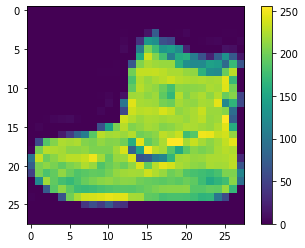

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

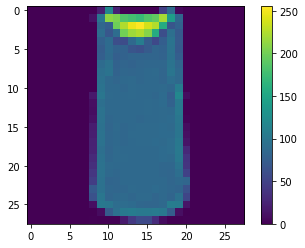

In [27]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images /255.0
test_images=test_images /255.0

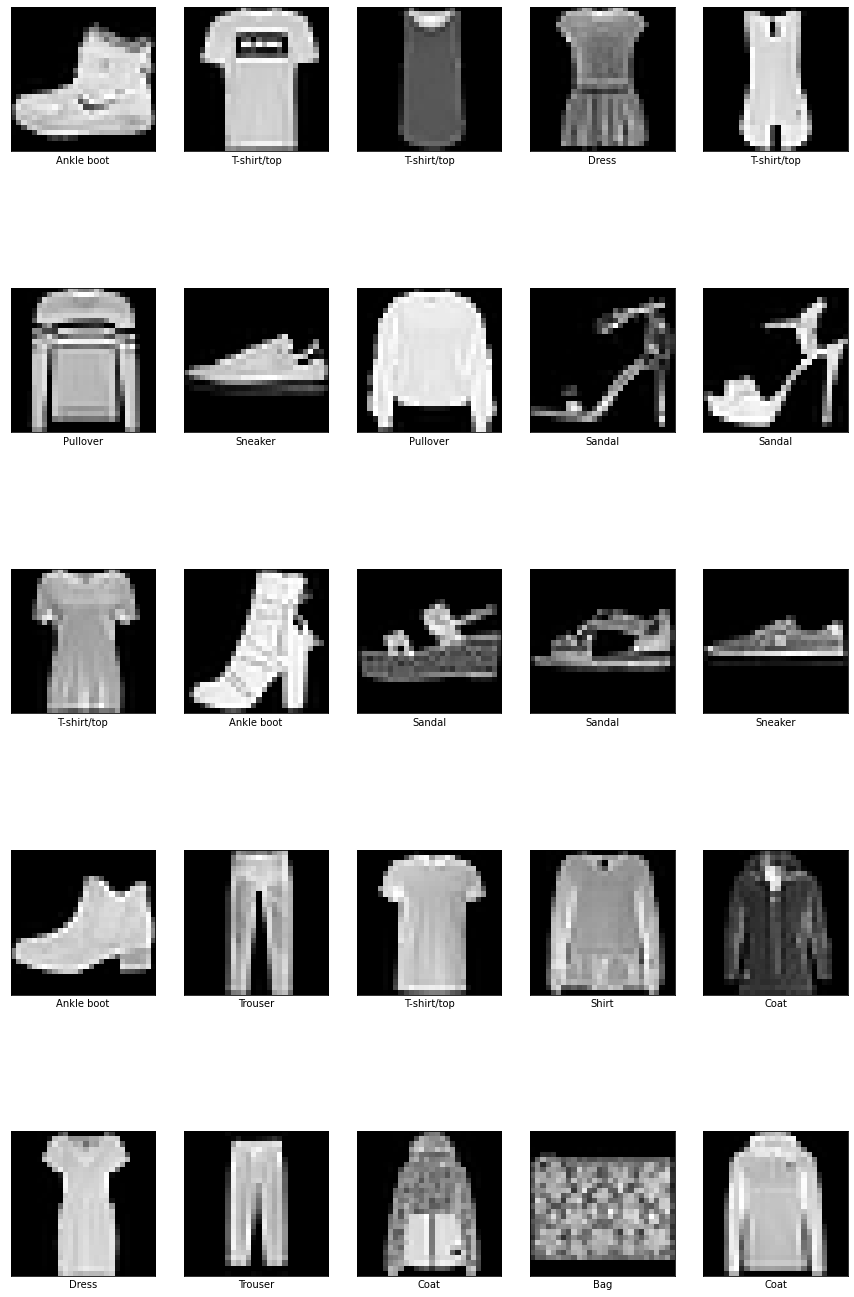

In [29]:
plt.figure(figsize=(15,25))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary_r)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
def create_model():
      model= tf.keras.models.Sequential()
      model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
      model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
      model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))                         
      return model                      
                         
                         

In [0]:
model=create_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2794 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2660 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2460 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [66]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("test accuracy",test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 2.4368 - accuracy: 0.1059
test accuracy 0.10589999705553055


In [0]:
predictions=model.predict(test_images)

In [36]:
predictions[0]

array([0.08377434, 0.09357709, 0.06396535, 0.09137523, 0.0918    ,
       0.15765749, 0.05723954, 0.09994   , 0.16543847, 0.0952325 ],
      dtype=float32)

In [37]:
np.argmax(predictions[0])

8

In [38]:
np.argmax(test_images[0])

577

In [39]:
test_labels[0]

9

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img=prediction_array[i],true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.array(predictions_array)
  if predicted_label.any()==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel(" {} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
def plot_value_array(i,predictions_array,true_label):
  predictions_array,true_label=predictions_array[i],true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')      


TypeError: ignored

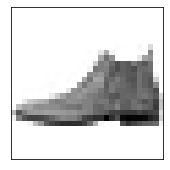

In [75]:

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

TypeError: ignored

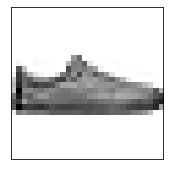

In [48]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

TypeError: ignored

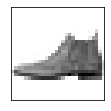

In [49]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions,test_labels)
plt.show()  

In [51]:
img=test_images[0]
img.shape

(28, 28)

In [0]:
img=(np.expand_dims(img,0))

In [53]:
img.shape

(1, 28, 28)

In [54]:
predictions_single=model.predict(img)
predictions_single

array([[0.08377434, 0.09357709, 0.06396534, 0.09137523, 0.09179998,
        0.15765749, 0.05723954, 0.09993998, 0.16543847, 0.09523249]],
      dtype=float32)

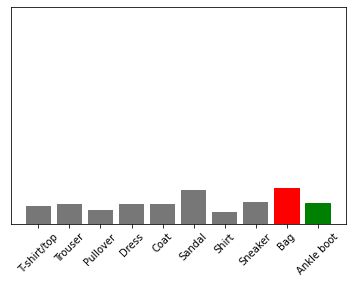

In [55]:
prediction_array=predictions_single
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [56]:
np.argmax(predictions_single[0])

8